In [209]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [210]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

In [211]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [212]:
# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [213]:
pd.DataFrame(y)

,0
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,0
9,0


### The Aim: To Explore the Effect on Accuracy of Varying the Number of Clusters

Time taken: 0.03989696502685547 seconds.


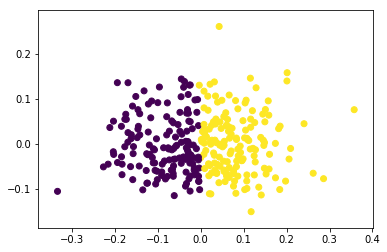

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99
[[84 65]
 [55 99]]
R2 Accuracy: 0.554455445545


In [214]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)
start_time = time.time()
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))
conf_mat = confusion_matrix(y_pred, y)
print(conf_mat)
print('R2 Accuracy:', (conf_mat[0][0] + conf_mat[0][0]) / conf_mat.sum().sum())

In [215]:
#Each batch will be made up of 200 data points.

minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
start_time = time.time()
predict_mini = minibatchkmeans.fit_predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time)) 
    
#minibatchkmeans = MiniBatchKMeans(
#    init='random',
#    n_clusters=2,
#    batch_size=200)
#minibatchkmeans.fit(X_pca)
#
## Add the new predicted cluster memberships to the data frame.
#predict_mini = minibatchkmeans.predict(X_pca)

print('Comparing k-means and mini batch k-means solutions:')
result = pd.crosstab(predict_mini, y)
print(result)
print('R2 Accuracy:', (result[0][0] + result[0][0]) / result.sum().sum())

Time taken: 0.018950223922729492 seconds.
Comparing k-means and mini batch k-means solutions:
col_0   0    1
row_0         
0      58  106
1      81   58
R2 Accuracy: 0.382838283828


### Try 3 Clusters

Time taken: 0.04089093208312988 seconds.


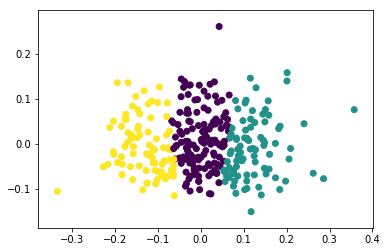

Comparing k-means clusters against the data:


In [216]:
start_time = time.time()

clusters = 3

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [217]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [218]:
clusters_for_plot = []
ratio_for_plot = []
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 3 clusters: 0.5775577557755776


In [219]:
best_ratio

[0.57755775577557755, 0.52475247524752477]

### Try 5 Clusters

Time taken: 0.0498654842376709 seconds.


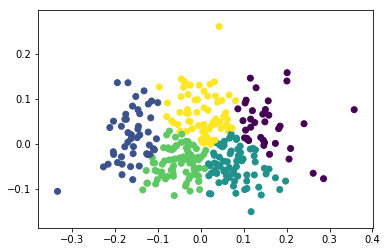

Comparing k-means clusters against the data:


In [220]:
start_time = time.time()

clusters = 5

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [221]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [222]:
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 5 clusters: 0.5610561056105611


### Try 10 Clusters

Time taken: 0.05784177780151367 seconds.


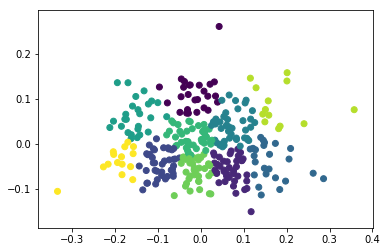

Comparing k-means clusters against the data:


In [223]:
start_time = time.time()

clusters = 10

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [224]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [225]:
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 10 clusters: 0.6006600660066007


### Try 20 Clusters

Time taken: 0.08926844596862793 seconds.


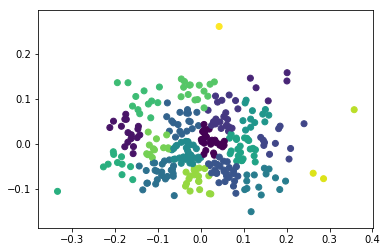

Comparing k-means clusters against the data:


In [226]:
start_time = time.time()

clusters = 20

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [227]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [228]:
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 20 clusters: 0.5544554455445545


### Try 30 Clusters

Time taken: 0.14959359169006348 seconds.


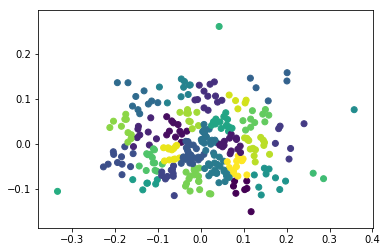

Comparing k-means clusters against the data:


In [229]:
start_time = time.time()

clusters = 30

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [230]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [231]:
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 30 clusters: 0.5511551155115512


### Try 50 Clusters

Time taken: 0.20444941520690918 seconds.


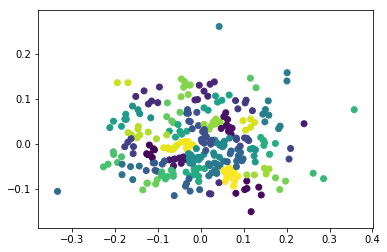

Comparing k-means clusters against the data:


In [232]:
start_time = time.time()

clusters = 50

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [233]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [234]:
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 50 clusters: 0.5643564356435643


### Try 100 Clusters

Time taken: 0.3181471824645996 seconds.


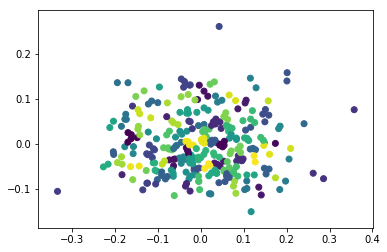

Comparing k-means clusters against the data:


In [236]:
start_time = time.time()

clusters = 100

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [237]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [238]:
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 100 clusters: 0.5577557755775577


### Try 8 Clusters

Time taken: 0.06282639503479004 seconds.


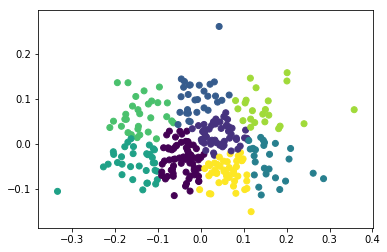

Comparing k-means clusters against the data:


In [239]:
start_time = time.time()

clusters = 8

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [240]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [241]:
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 8 clusters: 0.5907590759075908


### Try 12 Clusters

Time taken: 0.07874369621276855 seconds.


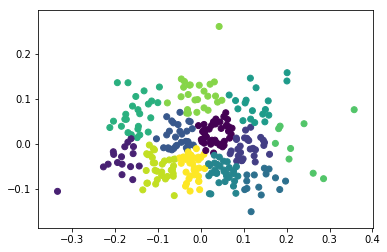

Comparing k-means clusters against the data:


In [242]:
start_time = time.time()

clusters = 12

km = KMeans(n_clusters=clusters, random_state=42).fit(X_pca)

y_pred_0 = km.predict(X_pca)
print('Time taken: {} seconds.'.format(time.time() - start_time))
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_0)
plt.show()
# Check the solution against the data.
print('Comparing k-means clusters against the data:')

In [243]:
results_dict = {}
for i in range(2, clusters):    
    y_pred = [0 if num == i else 1 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i] = [confusion_matrix(y_pred, y)]
    y_pred = [1 if num == i else 0 if num not in [0, 1] else num for num in y_pred_0]
    results_dict[i].append(confusion_matrix(y_pred, y))

In [244]:
best_ratio = []
for key in results_dict:
    matrix1 = results_dict[key][0]
    matrix2 = results_dict[key][1]
    ratio1 = (matrix1[0][0] + matrix1[1][1]) / matrix1.sum().sum()
    ratio2 = (matrix2[0][0] + matrix2[1][1]) / matrix2.sum().sum()
    best_ratio.extend([ratio1, ratio2])    
print('Best R2 accuracy with {} clusters: {}'.format(clusters, max(best_ratio)))
ratio_for_plot.append(max(best_ratio))
clusters_for_plot.append(clusters)

Best R2 accuracy with 12 clusters: 0.5775577557755776


### Plot Results vs. Number of Clusters Used
We see that the accuracy seems to peak at 10 clusters, with an R-squared value of 0.60. Above 10 clusters, the increased complexity does seem to cause a drop-off in accuracy.

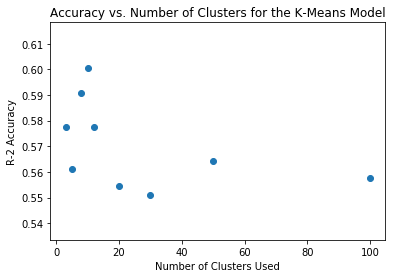

In [245]:
plt.scatter(x=clusters_for_plot, y=ratio_for_plot)
plt.xlabel('Number of Clusters Used')
plt.ylabel('R-2 Accuracy')
plt.title('Accuracy vs. Number of Clusters for the K-Means Model')
plt.show()